# surface layer tutorial

Welcome to the tutorial on the **napari** `Surface` layer!

This tutorial assumes you have already installed **napari**, know how to launch
the viewer, and are familiar with its layout. For help with installation see our
[installation](./installation) tutorial. For help getting started with the
viewer see our [getting started](./getting_started) tutorial. For help
understanding the organisation of the viewer, including things like the layers
list, the layer properties widgets, the layer control panels, and the dimension
sliders see our [napari viewer](./viewer) tutorial.

This tutorial will teach you about the **napari** `Surface` layer, including how
to display surface data and edit the properties of surfaces like the contrast,
opacity, colormaps and blending mode. At the end of the tutorial you should
understand how to add and manipulate surfaces both from the GUI and from the
console.

The surface layer allows you to display a precomputed surface mesh that is
defined by an NxD array of N vertices in D coordinates, an Mx3 integer array of
the indices of the triangles making up the faces of the surface, and a length N
list of values to associate with each vertex to use alongside a colormap.

## a simple example

You can create a new viewer and add a surface in one go using the
`napari.view_surface` method, or if you already have an existing viewer, you can
add an image to it using `viewer.add_surface`. The api of both methods is the
same. In these examples we'll mainly use `view_surface`.

A simple example of viewing a surface is as follows:

In [1]:
import napari
import numpy as np

vertices = np.array([[0, 0], [0, 20], [10, 0], [10, 10]])
faces = np.array([[0, 1, 2], [1, 2, 3]])
values = np.linspace(0, 1, len(vertices))
surface = (vertices, faces, values)

viewer = napari.view_surface(surface)  # add the surface

/opt/hostedtoolcache/Python/3.8.11/x64/lib/python3.8/site-packages/napari/_vispy/vispy_surface_layer.py:91: UserWarning: Alternative shading modes are only available in 3D, defaulting to none
  warnings.warn(


/opt/hostedtoolcache/Python/3.8.11/x64/lib/python3.8/site-packages/napari/_vispy/vispy_camera.py:109: RuntimeWarning: divide by zero encountered in true_divide
  zoom = np.min(canvas_size / scale)


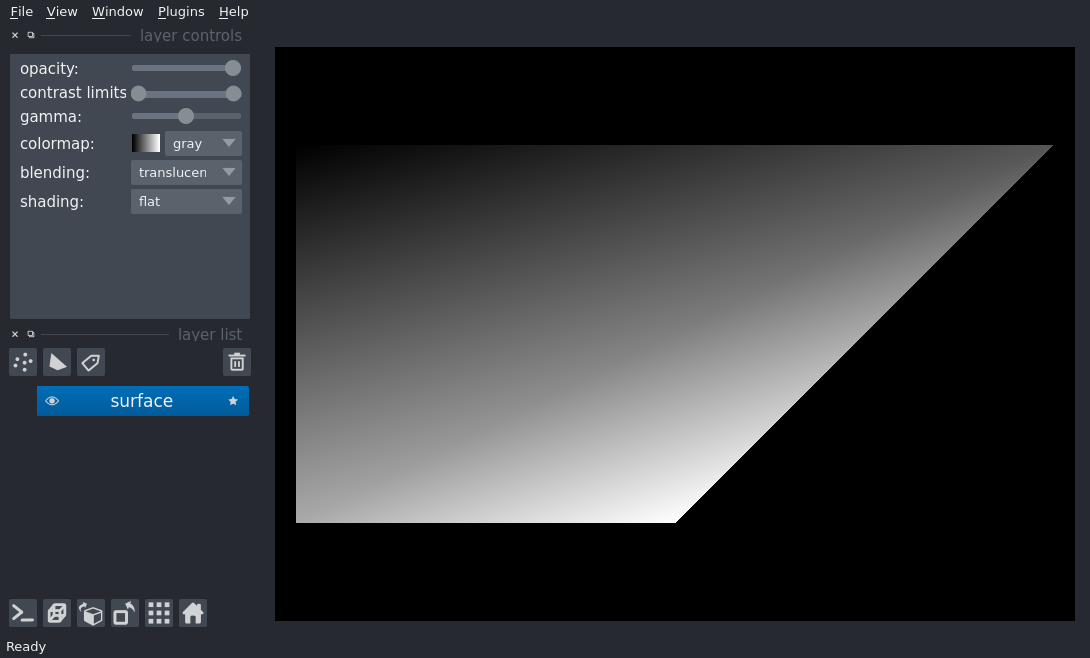

In [2]:
from napari.utils import nbscreenshot

nbscreenshot(viewer)

In [3]:
viewer.close()

## arguments of view_surface and add_surface

{meth}`~napari.view_layers.view_surface` and {meth}`~napari.Viewer.add_surface`
accept the same layer-creation parameters.

In [4]:
help(napari.view_surface)

Help on function view_surface in module napari.view_layers:

view_surface(data, *, colormap='gray', contrast_limits=None, gamma=1, name=None, metadata=None, scale=None, translate=None, rotate=None, shear=None, affine=None, opacity=1, blending='translucent', shading='flat', visible=True, title='napari', ndisplay=2, order=(), axis_labels=(), show=True) -> napari.viewer.Viewer
    Create a viewer and add a surface layer.
    
    Parameters
    ----------
    data : 2-tuple or 3-tuple of array
        The first element of the tuple is an (N, D) array of vertices of
        mesh triangles. The second is an (M, 3) array of int of indices
        of the mesh triangles. The optional third element is the
        (K0, ..., KL, N) array of values used to color vertices where the
        additional L dimensions are used to color the same mesh with
        different values. If not provided, it defaults to ones.
    colormap : str, napari.utils.Colormap, tuple, dict
        Colormap to use for lumi

## surface data

The data for a surface layer is defined by a 3-tuple of its vertices, faces, and
vertex values. The vertices are an NxD array of N vertices in D coordinates. The
faces are an Mx3 integer array of the indices of the triangles making up the
faces of the surface. The vertex values are a length N list of values to
associate with each vertex to use alongside a colormap. This 3-tuple is
accessible through the `layer.data` property.

## 3D rendering of images

All our layers can be rendered in both 2D and 3D mode, and one of our viewer
buttons can toggle between each mode. The number of dimensions sliders will be 2
or 3 less than the total number of dimensions of the layer. See for example
these brain surfaces rendered in 3D:

![image: brain surface](../assets/tutorials/brain_surface.gif)

## working with colormaps

The same colormaps available for the `Image` layer are also available for the
`Surface` layer. napari supports any colormap that is created with
`vispy.color.Colormap`. We provide access to some standard colormaps that you
can set using a string of their name.

In [5]:
list(napari.utils.colormaps.AVAILABLE_COLORMAPS)

['PiYG',
 'blue',
 'bop blue',
 'bop orange',
 'bop purple',
 'cyan',
 'gist_earth',
 'gray',
 'gray_r',
 'green',
 'hsv',
 'inferno',
 'magenta',
 'magma',
 'plasma',
 'red',
 'turbo',
 'twilight',
 'twilight_shifted',
 'viridis',
 'yellow']

Passing any of these as follows as keyword arguments will set the colormap of
that surface. You can also access the current colormap through the
`layer.colormap` property which returns a tuple of the colormap name followed by
the vispy colormap object. You can list all the available colormaps using
`layer.colormaps`.

It is also possible to create your own colormaps using vispy's
`vispy.color.Colormap` object, see it's full [documentation
here](http://vispy.org/color.html#vispy.color.Colormap). For more detail see the
[image layer tutorial](./image).

## adjusting contrast limits

The vertex values of the surface layer get mapped through its colormap according
to values called contrast limits. These are a 2-tuple of values defining how
what values get applied the minimum and maximum of the colormap and follow the
same principles as the `contrast_limits` described in the [image layer
tutorial](./image). They are also accessible through the same keyword arguments,
properties, and range slider as in the image layer.

## layer visibility

All our layers support a visibility toggle that allows you to set the `visible`
property of each layer. This property is located inside the layer widget in the
layers list and is represented by an eye icon.

## layer opacity

All our layers support an opacity slider and `opacity` property that allow you
to adjust the layer opacity between 0, fully invisible, and 1, fully visible.

## blending layers

All our layers support three blending modes `translucent`, `additive`, and
`opaque` that determine how the visuals for this layer get mixed with the
visuals from the other layers.

An `opaque` layer renders all the other layers below it invisible and will fade
to black as you decrease its opacity.

The `translucent` setting will cause the layer to blend with the layers below it
if you decrease its opacity but will fully block those layers if its opacity is
`1`. This is a reasonable default, useful for many applications.

The final blending mode `additive` will cause the layer to blend with the layers
below even when it has full opacity. This mode is especially useful for
visualizing multiple layers at the same time.

## naming layers

All our layers support a `name` property that can be set inside a text box
inside the layer widget in the layers list. The name of each layer is forced
into being unique so that you can use the name to index into `viewer.layers` to
retrieve the layer object.

## scaling layers

All our layers support a `scale` property and keyword argument that will rescale
the layer multiplicatively according to the scale values (one for each
dimension). This property can be particularly useful for viewing anisotropic
data where the size of the voxel in the z dimension might be different then the
size in the x and y dimensions.

## translating layers

All our layers support a `translate` property and keyword argument that you can
use to offset a layer relative to the other layers, which could be useful if you
are trying to overlay two layers for image registration purposes.

## layer metadata

All our layers also support a `metadata` property and keyword argument that you
can use to store an arbitrary metadata dictionary on the layer.

## next steps

Hopefully, this tutorial has given you a detailed understanding of the `Vectors`
layer, including how to create one and control its properties. To learn more
about some of the other layer types that **napari** supports checkout some more
of our tutorials listed below. The [vectors layer](./vectors) tutorial is a
great one to try next as it describes rendering lots of lines.